In [1]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf

In [3]:
# File to Load (Remember to Change These)
AAPL_ticker = Path("Stock_data/AAPL.csv")
AAPL_stock = pd.read_csv(AAPL_ticker)
AAPL_stock["Ticker"]= "AAPL"

AMZN_ticker = Path("Stock_data/AMZN.csv")
AMZN_stock = pd.read_csv(AMZN_ticker)
AMZN_stock["Ticker"]= "AMZN"

CSCO_ticker = Path("Stock_data/CSCO.csv")
CSCO_stock = pd.read_csv(CSCO_ticker)
CSCO_stock["Ticker"]= "CSCO"


EBAY_ticker = Path("Stock_data/EBAY.csv")
EBAY_stock = pd.read_csv(EBAY_ticker)
EBAY_stock["Ticker"]= "EBAY"

GOOG_ticker = Path("Stock_data/GOOG.csv")
GOOG_stock = pd.read_csv(GOOG_ticker)
GOOG_stock["Ticker"]= "GOOG"

IBM_ticker = Path("Stock_data/IBM.csv")
IBM_stock = pd.read_csv(IBM_ticker)
IBM_stock["Ticker"]= "IBM"

MSFT_ticker = Path("Stock_data/MSFT.csv")
MSFT_stock = pd.read_csv(MSFT_ticker)
MSFT_stock["Ticker"]= "MSFT"

NVDA_ticker = Path("Stock_data/NVDA.csv")
NVDA_stock = pd.read_csv(NVDA_ticker)
NVDA_stock["Ticker"]= "NVDA"

T_ticker = Path("Stock_data/T.csv")
T_stock = pd.read_csv(T_ticker)
T_stock["Ticker"]= "T"


TSLA_ticker = Path("Stock_data/TSLA.csv")
TSLA_stock = pd.read_csv(TSLA_ticker)
TSLA_stock["Ticker"]= "TSLA"

# student_data= Path("Resources/students_complete.csv")

In [4]:
#Combining all the Ticker data into a single DataFrame
stock_combined_df = pd.concat([AAPL_stock,AMZN_stock,CSCO_stock,EBAY_stock,GOOG_stock,IBM_stock,MSFT_stock,NVDA_stock,T_stock,TSLA_stock],ignore_index=True)

In [5]:
data1=stock_combined_df.copy()
data1.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL


In [6]:
data1['Date']=pd.to_datetime(data1['Date'])

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\828067985.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data1['Date']=pd.to_datetime(data1['Date'])


In [7]:
data1['Year']=data1['Date'].dt.year

In [8]:
data1.dtypes

Date              datetime64[ns]
Low                      float64
Open                     float64
Volume                     int64
High                     float64
Close                    float64
Adjusted Close           float64
Ticker                    object
Year                       int64
dtype: object

In [9]:
data1['Month']=data1['Date'].dt.month

In [10]:
test=data1[(data1['Ticker'] == "AAPL") & (data1['Year'] == 2021)].groupby(['Month'])['Close'].mean().reset_index()

In [11]:
test.head(2)

,Month,Close
0,1,136.919048
1,2,134.185295


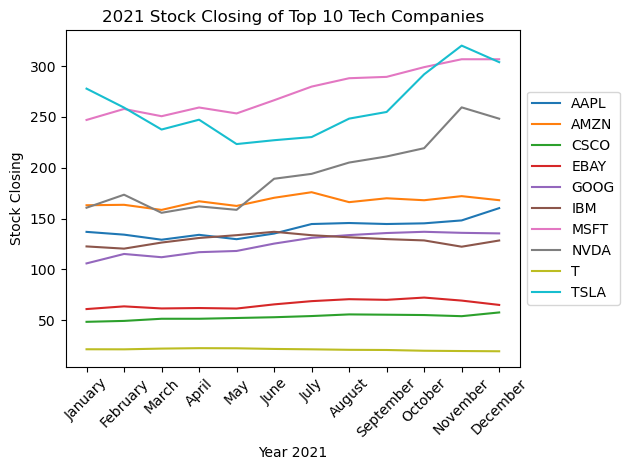

In [12]:
import matplotlib.pyplot as plt
import calendar

# Create an empty list to store legend labels
legend_labels = []

# Add the following line to enable interactive plotting in Jupyter Notebook
%matplotlib inline

for i in data1.Ticker.unique():
    test = data1[(data1['Ticker'] == i) & (data1['Year'] == 2021)].groupby(['Month'])['Close'].mean().reset_index()
    
    # Convert month numbers to month names
    test['Month'] = test['Month'].apply(lambda x: calendar.month_name[x])
    
    plt.plot(test['Month'], test['Close'])
    legend_labels.append(i)  # Add the current 'Ticker' to the legend labels list

plt.xlabel("Year 2021")

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.ylabel("Stock Closing")
# Add a legend with the labels from the legend_labels list
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Add a title
plt.title("2021 Stock Closing of Top 10 Tech Companies")

# Apply tight layout
plt.tight_layout()

# Display the plot
plt.show()


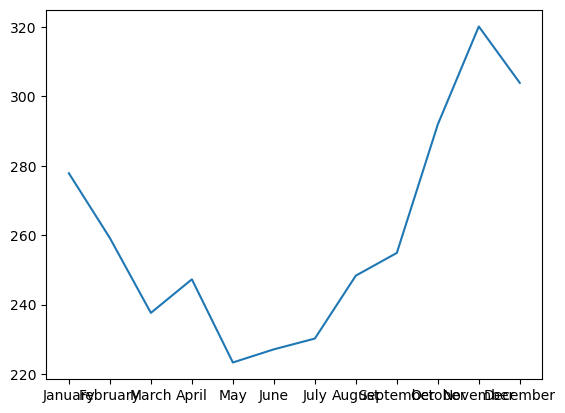

In [13]:
plt.plot(test['Month'],test['Close'])

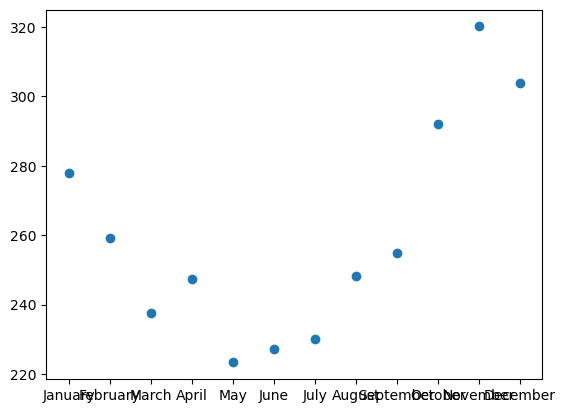

In [14]:
plt.scatter(test['Month'],test['Close'])

<Axes: xlabel='Month'>

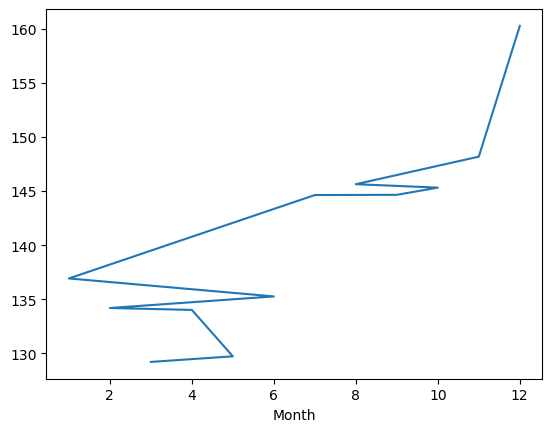

In [15]:
data1[(data1['Ticker'] == "AAPL") & (data1['Year'] == 2021)].groupby(['Month'])['Close'].mean().sort_values().plot()

In [16]:
data1.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker,Year,Month
0,1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL,1980,12
1,1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL,1980,12
2,1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL,1980,12
3,1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL,1980,12
4,1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL,1980,12


In [17]:
data1.Ticker.unique()

array(['AAPL', 'AMZN', 'CSCO', 'EBAY', 'GOOG', 'IBM', 'MSFT', 'NVDA', 'T',
       'TSLA'], dtype=object)

In [18]:
data1['Month']

0        12
1        12
2        12
3        12
4        12
         ..
77615     6
77616     7
77617     8
77618     9
77619    12
Name: Month, Length: 77620, dtype: int64

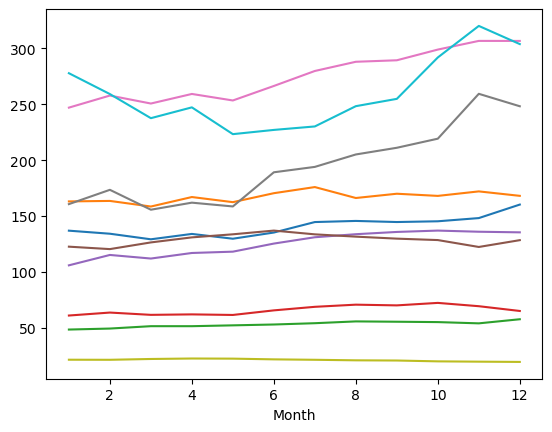

In [19]:
for i in data1.Ticker.unique():
    data1[(data1.Ticker==i)&(data1.Year==2021)].groupby(['Month'])['Close'].mean().plot()
    

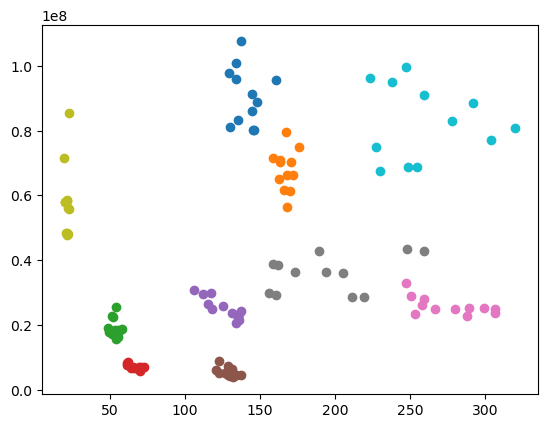

In [20]:
for i in data1.Ticker.unique():
    plt.scatter(x=data1[(data1.Ticker==i)&(data1.Year==2021)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker==i)&(data1.Year==2021)].groupby(['Month'])['Volume'].mean())

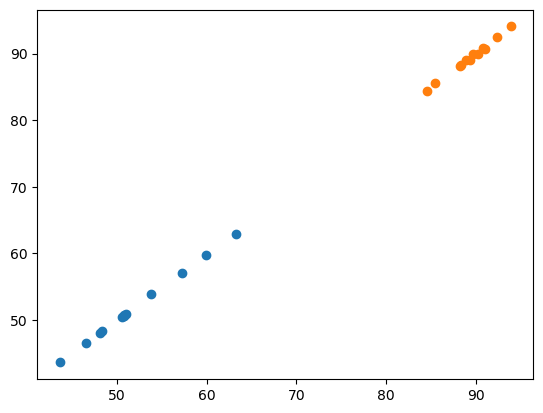

In [21]:
plt.scatter(x=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Open'].mean())
    
plt.scatter(x=data1[(data1.Ticker=="AMZN")&(data1.Year==2019)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker=="AMZN")&(data1.Year==2019)].groupby(['Month'])['Open'].mean())

y = -112.88x + 170.66
-0.4580926996775941


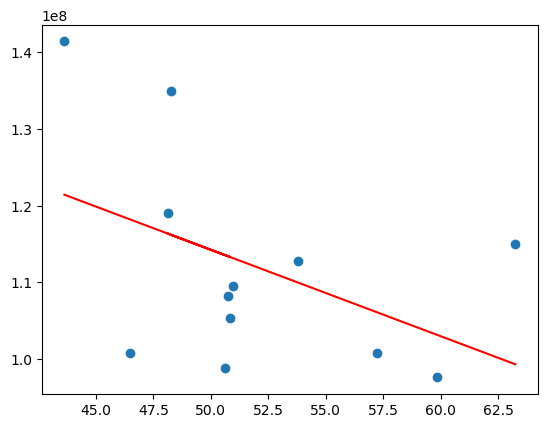

In [22]:
   plt.scatter(x=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Volume'].mean())
from scipy.stats import linregress


x=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Close'].mean()
y=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Volume'].mean()


(slope,intercept, rvalue, pvalue, stderr)=linregress(x, y)
regress_values= x*slope+intercept
line_eq = "y = " + str(round(slope/10000,2)) + "x + " + str(round(intercept/1000000,2))
plt.plot(x,regress_values, color='red')

plt.annotate(line_eq, (55,1.35),fontsize = 10, color="red")

print(line_eq)

print(rvalue) 

<Axes: xlabel='Month'>

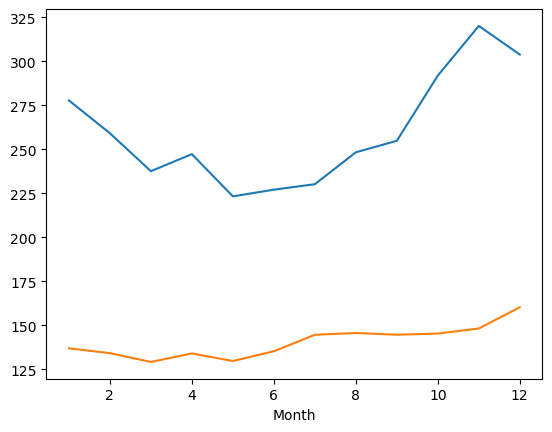

In [23]:
data1[(data1.Ticker=='TSLA')&(data1.Year==2021)].groupby(['Month'])['Close'].mean().plot()
data1[(data1.Ticker=='AAPL')&(data1.Year==2021)].groupby(['Month'])['Close'].mean().plot()

In [24]:
#Checking for NAs
stock_combined_df.isna().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
Ticker            0
dtype: int64

In [25]:
#Filtering the data based on the 10 year period
stock_combined_df['Date'] = pd.to_datetime(stock_combined_df['Date'], format='%d-%m-%Y')
start_date = '2010-01-01'
end_date = '2021-12-31'

stocks_filtered_df = stock_combined_df[(stock_combined_df['Date'] >= start_date) & (stock_combined_df['Date'] <= end_date)]

In [26]:
stocks_filtered_df.head(1)

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
7331,2010-01-04,7.585,7.6225,493729600,7.660714,7.643214,6.515212,AAPL


In [27]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
average_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].mean()

# Reset the index to make 'Ticker' and 'Year' regular columns
average_close_by_ticker_year = average_close_by_ticker_year.reset_index()

# Rename the columns for clarity
average_close_by_ticker_year.columns = ['Ticker', 'Year', 'Average_Close']

# Display the resulting DataFrame
average_close_by_ticker_year


C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\456655445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,Average_Close
0,AAPL,2010,9.280088
1,AAPL,2011,13.000154
2,AAPL,2012,20.573204
3,AAPL,2013,16.879817
4,AAPL,2014,23.066164
...,...,...,...
115,TSLA,2017,20.954420
116,TSLA,2018,21.153995
117,TSLA,2019,18.235347
118,TSLA,2020,96.665689


In [28]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
median_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].median()

# Reset the index to make 'Ticker' and 'Year' regular columns
median_close_by_ticker_year = median_close_by_ticker_year.reset_index()

# Rename the columns for clarity
median_close_by_ticker_year.columns = ['Ticker', 'Year', 'Median_Close']

# Display the resulting DataFrame
median_close_by_ticker_year

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\2401310653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,Median_Close
0,AAPL,2010,9.180893
1,AAPL,2011,12.750893
2,AAPL,2012,20.803214
3,AAPL,2013,16.466965
4,AAPL,2014,23.475000
...,...,...,...
115,TSLA,2017,21.170000
116,TSLA,2018,21.257999
117,TSLA,2019,17.353001
118,TSLA,2020,80.577332


In [29]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
var_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].var()

# Reset the index to make 'Ticker' and 'Year' regular columns
var_close_by_ticker_year = var_close_by_ticker_year.reset_index()

# Rename the columns for clarity
var_close_by_ticker_year.columns = ['Ticker', 'Year', 'Variance_Close']

# Display the resulting DataFrame
var_close_by_ticker_year

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\3405814854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,Variance_Close
0,AAPL,2010,1.799091
1,AAPL,2011,0.857201
2,AAPL,2012,5.721816
3,AAPL,2013,2.570043
4,AAPL,2014,11.174467
...,...,...,...
115,TSLA,2017,7.458840
116,TSLA,2018,3.676223
117,TSLA,2019,12.498708
118,TSLA,2020,3173.279615


In [30]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
std_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].std()

# Reset the index to make 'Ticker' and 'Year' regular columns
std_close_by_ticker_year = std_close_by_ticker_year.reset_index()

# Rename the columns for clarity
std_close_by_ticker_year.columns = ['Ticker', 'Year', 'StandardDev_Close']

# Display the resulting DataFrame
std_close_by_ticker_year

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\3815308630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,StandardDev_Close
0,AAPL,2010,1.341302
1,AAPL,2011,0.925852
2,AAPL,2012,2.392032
3,AAPL,2013,1.603135
4,AAPL,2014,3.342823
...,...,...,...
115,TSLA,2017,2.731088
116,TSLA,2018,1.917348
117,TSLA,2019,3.535351
118,TSLA,2020,56.331870


In [31]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
min_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].min()

# Reset the index to make 'Ticker' and 'Year' regular columns
min_close_by_ticker_year = min_close_by_ticker_year.reset_index()

# Rename the columns for clarity
min_close_by_ticker_year.columns = ['Ticker', 'Year', 'Minimum_Close']

# Display the resulting DataFrame
min_close_by_ticker_year

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\678081867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,Minimum_Close
0,AAPL,2010,6.858929
1,AAPL,2011,11.261429
2,AAPL,2012,14.686786
3,AAPL,2013,13.947500
4,AAPL,2014,17.849285
...,...,...,...
115,TSLA,2017,14.466000
116,TSLA,2018,16.704000
117,TSLA,2019,11.931333
118,TSLA,2020,24.081333


In [32]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
max_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].max()

# Reset the index to make 'Ticker' and 'Year' regular columns
max_close_by_ticker_year = max_close_by_ticker_year.reset_index()

# Rename the columns for clarity
max_close_by_ticker_year.columns = ['Ticker', 'Year', 'Maximum_Close']

# Display the resulting DataFrame
max_close_by_ticker_year

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\3955968510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,Maximum_Close
0,AAPL,2010,11.623929
1,AAPL,2011,15.080000
2,AAPL,2012,25.075001
3,AAPL,2013,20.360357
4,AAPL,2014,29.750000
...,...,...,...
115,TSLA,2017,25.666668
116,TSLA,2018,25.304667
117,TSLA,2019,28.729334
118,TSLA,2020,235.223328


In [33]:
stock_combined_df['Ticker'].dtypes

dtype('O')

In [34]:

# Define your categorization logic as a function
def categorize_ticker(ticker_symbol):
    if ticker_symbol in ['AAPL', 'AMZN', 'CSCO', 'EBAY', 'GOOG', 'MSFT', 'NVDA','TSLA']:
        return "NASDAQ"
    elif ticker_symbol in ["T", "IBM"]:
        return "NYSE"
    else:
        return "Other"
# Create a new column to store the categories
max_close_by_ticker_year["Stock_Listing"] = None
# Use a for loop to categorize ticker symbols
for index, row in max_close_by_ticker_year.iterrows():
    ticker_symbol = row["Ticker"]
    category = categorize_ticker(ticker_symbol)
    max_close_by_ticker_year.at[index, "Stock_Listing"] = category
# Print the resulting DataFrame
print(max_close_by_ticker_year)

    Ticker  Year  Maximum_Close Stock_Listing
0     AAPL  2010      11.623929        NASDAQ
1     AAPL  2011      15.080000        NASDAQ
2     AAPL  2012      25.075001        NASDAQ
3     AAPL  2013      20.360357        NASDAQ
4     AAPL  2014      29.750000        NASDAQ
..     ...   ...            ...           ...
115   TSLA  2017      25.666668        NASDAQ
116   TSLA  2018      25.304667        NASDAQ
117   TSLA  2019      28.729334        NASDAQ
118   TSLA  2020     235.223328        NASDAQ
119   TSLA  2021     409.970001        NASDAQ

[120 rows x 4 columns]


In [35]:
max_close_by_ticker_year.loc[max_close_by_ticker_year['Ticker']=="IBM"]

,Ticker,Year,Maximum_Close,Stock_Listing
60,IBM,2010,140.458893,NYSE
61,IBM,2011,186.003830,NYSE
62,IBM,2012,201.720840,NYSE
63,IBM,2013,206.309753,NYSE
64,IBM,2014,189.072662,NYSE
65,IBM,2015,166.730408,NYSE
66,IBM,2016,161.099426,NYSE
67,IBM,2017,173.948380,NYSE
68,IBM,2018,161.682602,NYSE
69,IBM,2019,144.703629,NYSE


In [36]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
SEM_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].sem()

# Reset the index to make 'Ticker' and 'Year' regular columns
SEM_close_by_ticker_year = SEM_close_by_ticker_year.reset_index()

# Rename the columns for clarity
SEM_close_by_ticker_year.columns = ['Ticker', 'Year', 'SEM']

# Display the resulting DataFrame
SEM_close_by_ticker_year

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\3690047831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year


,Ticker,Year,SEM
0,AAPL,2010,0.084494
1,AAPL,2011,0.058323
2,AAPL,2012,0.151285
3,AAPL,2013,0.100988
4,AAPL,2014,0.210578
...,...,...,...
115,TSLA,2017,0.172385
116,TSLA,2018,0.121022
117,TSLA,2019,0.222706
118,TSLA,2020,3.541554


In [37]:
Summary_Stats_Stock = pd.merge(
    average_close_by_ticker_year,
    median_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    var_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    std_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    min_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    max_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    SEM_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock

,Ticker,Year,Average_Close,Median_Close,Variance_Close,StandardDev_Close,Minimum_Close,Maximum_Close,Stock_Listing,SEM
0,AAPL,2010,9.280088,9.180893,1.799091,1.341302,6.858929,11.623929,NASDAQ,0.084494
1,AAPL,2011,13.000154,12.750893,0.857201,0.925852,11.261429,15.080000,NASDAQ,0.058323
2,AAPL,2012,20.573204,20.803214,5.721816,2.392032,14.686786,25.075001,NASDAQ,0.151285
3,AAPL,2013,16.879817,16.466965,2.570043,1.603135,13.947500,20.360357,NASDAQ,0.100988
4,AAPL,2014,23.066164,23.475000,11.174467,3.342823,17.849285,29.750000,NASDAQ,0.210578
...,...,...,...,...,...,...,...,...,...,...
115,TSLA,2017,20.954420,21.170000,7.458840,2.731088,14.466000,25.666668,NASDAQ,0.172385
116,TSLA,2018,21.153995,21.257999,3.676223,1.917348,16.704000,25.304667,NASDAQ,0.121022
117,TSLA,2019,18.235347,17.353001,12.498708,3.535351,11.931333,28.729334,NASDAQ,0.222706
118,TSLA,2020,96.665689,80.577332,3173.279615,56.331870,24.081333,235.223328,NASDAQ,3.541554


In [38]:
dff=Summary_Stats_Stock[Summary_Stats_Stock.Ticker=='TSLA'][['Year','Average_Close']]

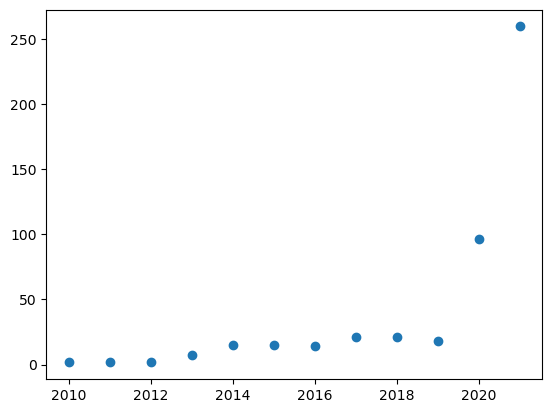

In [39]:
plt.scatter(dff['Year'],dff['Average_Close'])

In [40]:
groupby_stocks_avg=Summary_Stats_Stock.groupby("Ticker")["Average_Close"].mean()
groupby_stocks_avg.head()

Ticker
AAPL    42.688499
AMZN    53.284019
CSCO    32.249335
EBAY    29.952706
GOOG    43.465112
Name: Average_Close, dtype: float64

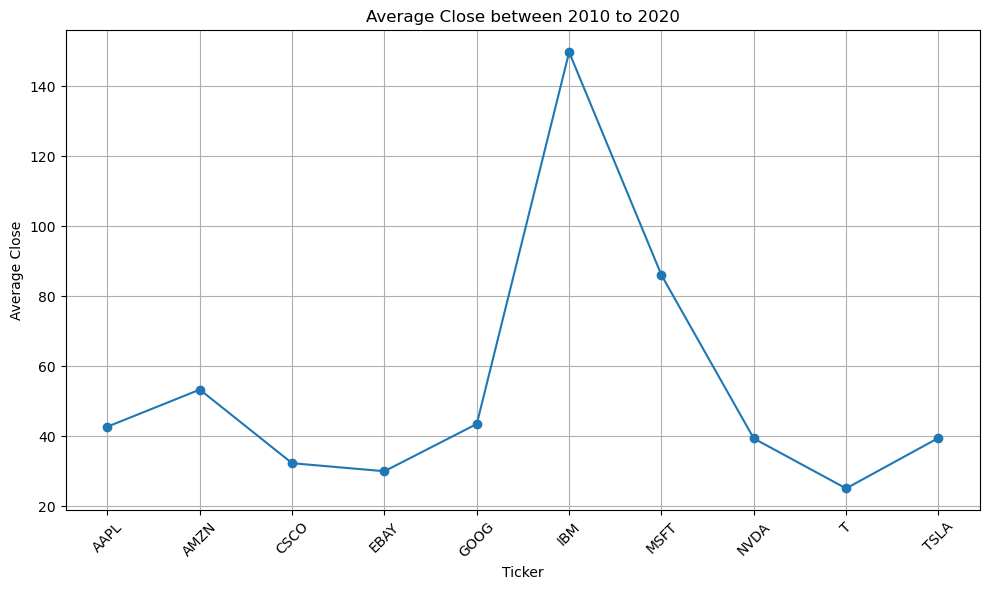

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
x = Summary_Stats_Stock["Ticker"].unique()
y = groupby_stocks_avg

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel("Ticker")
plt.ylabel("Average Close")
plt.title("Average Close between 2010 to 2020")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


In [42]:
AAPL_stock

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL
...,...,...,...,...,...,...,...,...
10585,06-12-2022,141.919998,147.070007,64727200,147.300003,142.910004,142.910004,AAPL
10586,07-12-2022,140.000000,142.190002,69721100,143.369995,140.940002,140.940002,AAPL
10587,08-12-2022,141.100006,142.360001,62128300,143.520004,142.649994,142.649994,AAPL
10588,09-12-2022,140.899994,142.339996,76069500,145.570007,142.160004,142.160004,AAPL


In [43]:
AAPL_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10590 entries, 0 to 10589
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10590 non-null  object 
 1   Low             10590 non-null  float64
 2   Open            10590 non-null  float64
 3   Volume          10590 non-null  int64  
 4   High            10590 non-null  float64
 5   Close           10590 non-null  float64
 6   Adjusted Close  10590 non-null  float64
 7   Ticker          10590 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 662.0+ KB


In [44]:
AAPL_stock.columns

Index(['Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close',
       'Ticker'],
      dtype='object')

In [45]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77620 entries, 0 to 77619
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            77620 non-null  datetime64[ns]
 1   Low             77620 non-null  float64       
 2   Open            77620 non-null  float64       
 3   Volume          77620 non-null  int64         
 4   High            77620 non-null  float64       
 5   Close           77620 non-null  float64       
 6   Adjusted Close  77620 non-null  float64       
 7   Ticker          77620 non-null  object        
 8   Year            77620 non-null  int64         
 9   Month           77620 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 5.9+ MB


In [46]:
#The function datetime converts AAPL_stock column into a datetime column
AAPL_stock.Date = pd.to_datetime(AAPL_stock.Date)
AAPL_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10590 entries, 0 to 10589
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10590 non-null  datetime64[ns]
 1   Low             10590 non-null  float64       
 2   Open            10590 non-null  float64       
 3   Volume          10590 non-null  int64         
 4   High            10590 non-null  float64       
 5   Close           10590 non-null  float64       
 6   Adjusted Close  10590 non-null  float64       
 7   Ticker          10590 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 662.0+ KB


C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\599229364.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  AAPL_stock.Date = pd.to_datetime(AAPL_stock.Date)


In [47]:
data1 = data1.set_index("Date")

In [48]:
data1.head(40)

,Low,Open,Volume,High,Close,Adjusted Close,Ticker,Year,Month
Date,,,,,,,,,
1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL,1980,12
1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL,1980,12
1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL,1980,12
1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL,1980,12
1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL,1980,12
1980-12-19,0.126116,0.126116,48630400,0.126674,0.126116,0.098137,AAPL,1980,12
1980-12-22,0.132254,0.132254,37363200,0.132813,0.132254,0.102913,AAPL,1980,12
1980-12-23,0.137835,0.137835,46950400,0.138393,0.137835,0.107256,AAPL,1980,12
1980-12-24,0.145089,0.145089,48003200,0.145647,0.145089,0.112901,AAPL,1980,12


In [49]:
#This transfers the "Date" column into the index column.  
#This removal of the "Date" column, makes it easier to graph the stocks
AAPL_stock = AAPL_stock.set_index("Date")

In [50]:
AAPL_stock

,Low,Open,Volume,High,Close,Adjusted Close,Ticker
Date,,,,,,,
1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL
1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL
1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL
1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL
1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL
...,...,...,...,...,...,...,...
2022-06-12,141.919998,147.070007,64727200,147.300003,142.910004,142.910004,AAPL
2022-07-12,140.000000,142.190002,69721100,143.369995,140.940002,140.940002,AAPL
2022-08-12,141.100006,142.360001,62128300,143.520004,142.649994,142.649994,AAPL


In [66]:
AAPL_test=data1[(data1['Ticker'] == 'AAPL')]
AAPL_test.head()

,Low,Open,Volume,High,Close,Adjusted Close,Ticker,Year,Month
Date,,,,,,,,,
1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL,1980,12
1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL,1980,12
1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL,1980,12
1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL,1980,12
1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL,1980,12


In [52]:
GOOG_test=data1[(data1['Ticker'] == 'GOOG')]
GOOG_test.tail()

,Low,Open,Volume,High,Close,Adjusted Close,Ticker,Year,Month
Date,,,,,,,,,
2022-06-12,96.760002,99.669998,20877600,100.209999,97.309998,97.309998,GOOG,2022,6
2022-07-12,95.025002,96.769997,26647900,97.309998,95.150002,95.150002,GOOG,2022,7
2022-08-12,93.800003,95.690002,25593200,95.870003,93.949997,93.949997,GOOG,2022,8
2022-09-12,93.019997,93.900002,21873700,94.489998,93.070000,93.070000,GOOG,2022,9
2022-12-12,91.900002,93.089996,7849646,93.874496,92.464996,92.464996,GOOG,2022,12


In [53]:
MSFT_test=data1[(data1['Ticker'] == 'MSFT')]
MSFT_test.tail()

,Low,Open,Volume,High,Close,Adjusted Close,Ticker,Year,Month
Date,,,,,,,,,
2022-06-12,243.779999,250.820007,22463700,251.860001,245.119995,245.119995,MSFT,2022,6
2022-07-12,242.210007,244.830002,20481500,246.160004,244.369995,244.369995,MSFT,2022,7
2022-08-12,243.059998,244.839996,22611800,248.740005,247.399994,247.399994,MSFT,2022,8
2022-09-12,244.160004,244.699997,20607100,248.309998,245.419998,245.419998,MSFT,2022,9
2022-12-12,247.179993,247.445007,10714493,252.151596,250.669998,250.669998,MSFT,2022,12


In [54]:
#mpf.plot(data1[])
TSLA_test=data1[(data1['Ticker'] == 'TSLA')]
TSLA_test.tail()


,Low,Open,Volume,High,Close,Adjusted Close,Ticker,Year,Month
Date,,,,,,,,,
2022-06-12,175.330002,181.220001,92150800,183.649994,179.820007,179.820007,TSLA,2022,6
2022-07-12,172.220001,175.029999,84213300,179.380005,174.039993,174.039993,TSLA,2022,7
2022-08-12,169.059998,172.199997,97624500,175.199997,173.440002,173.440002,TSLA,2022,8
2022-09-12,173.360001,173.839996,104746600,182.500000,179.050003,179.050003,TSLA,2022,9
2022-12-12,170.389999,176.100006,36780366,177.359894,172.190002,172.190002,TSLA,2022,12


C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\623281690.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(AAPL_stock['2020'])


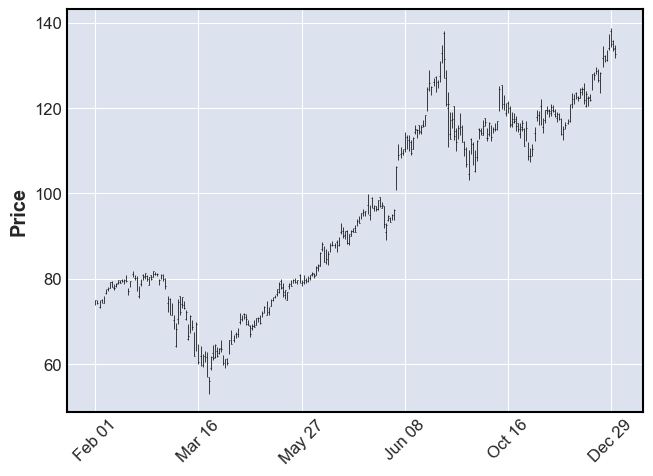

In [55]:
mpf.plot(AAPL_stock['2020'])

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\3920825172.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(AAPL_stock['2020'],volume=True)


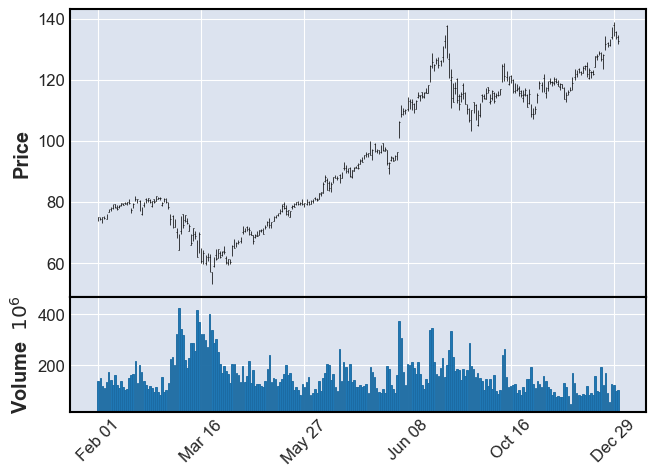

In [56]:
#This line displays both the volume and the stock price
mpf.plot(AAPL_stock['2020'],volume=True)

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\2282236139.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  mpf.plot(GOOG_test['2020':'2021'],figratio=(20,12),


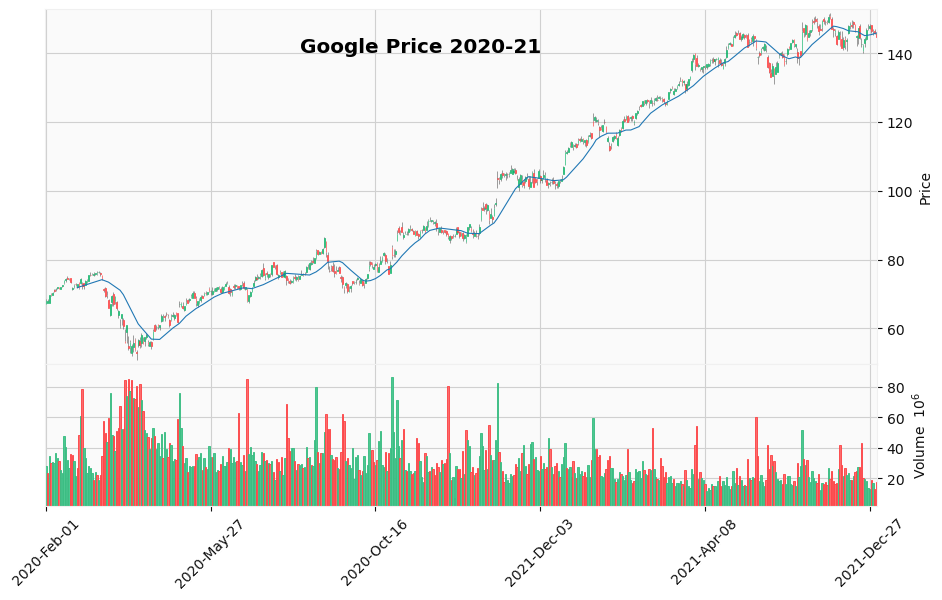

In [57]:
#figratio changes the size of the graph
mpf.plot(GOOG_test['2020':'2021'],figratio=(20,12), 
         type='candle',
         title = 'Google Price 2020-21',
         mav=(20), volume=True, 
         tight_layout=True,
         style = 'yahoo')

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\3191584170.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  mpf.plot(MSFT_test['2020':'2021'],figratio=(20,12),


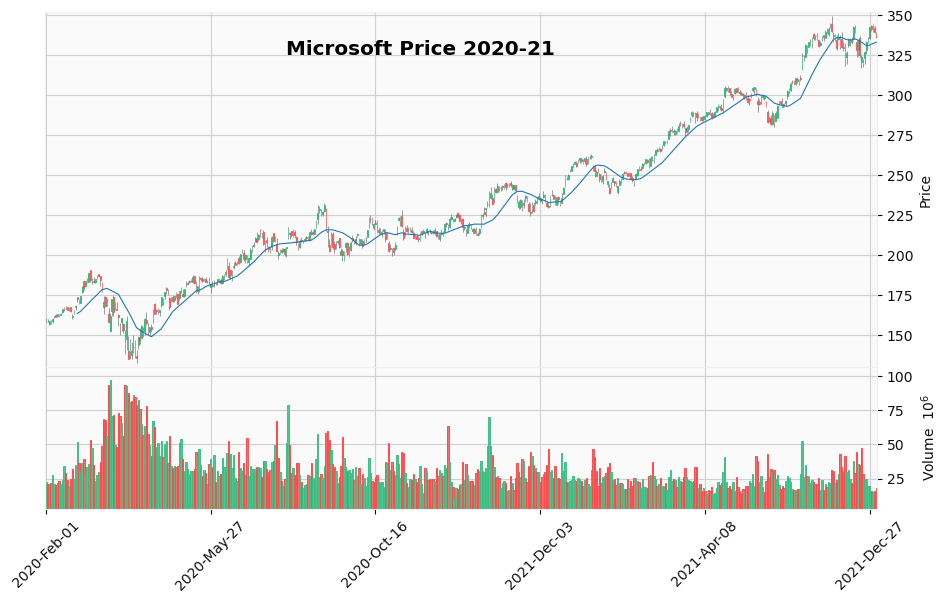

In [58]:
#figratio changes the size of the graph
mpf.plot(MSFT_test['2020':'2021'],figratio=(20,12), 
         type='candle',
         title = 'Microsoft Price 2020-21',
         mav=(20), volume=True, 
         tight_layout=True,
         style = 'yahoo')

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\3557989158.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  mpf.plot(TSLA_test['2020':'2021'],figratio=(20,12),


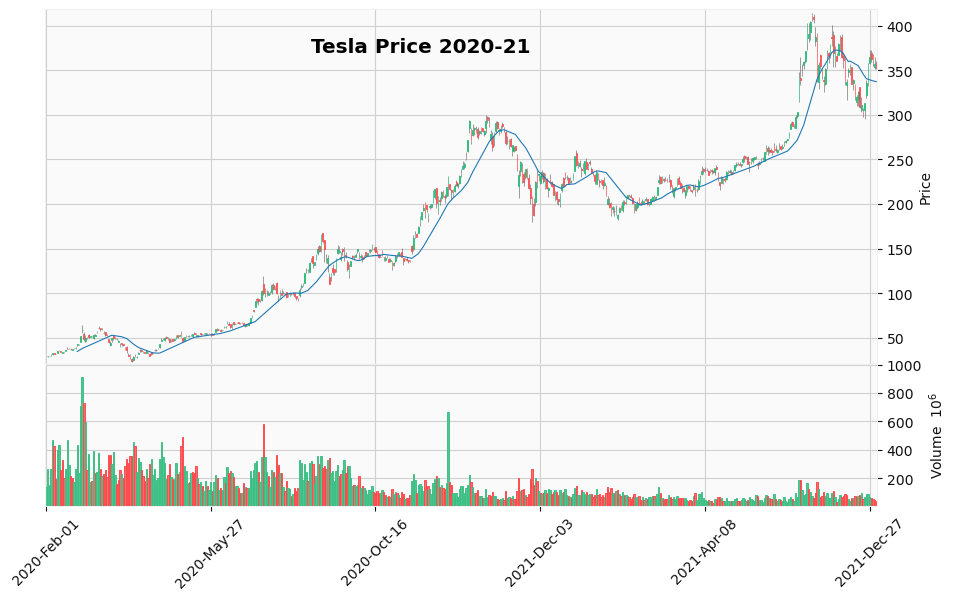

In [59]:
#figratio changes the size of the graph
mpf.plot(TSLA_test['2020':'2021'],figratio=(20,12), 
         type='candle',
         title = 'Tesla Price 2020-21',
         mav=(20), volume=True, 
         tight_layout=True,
         style = 'yahoo')

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\1697666929.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  mpf.plot(AAPL_stock['2020':'2021'],figratio=(20,12),


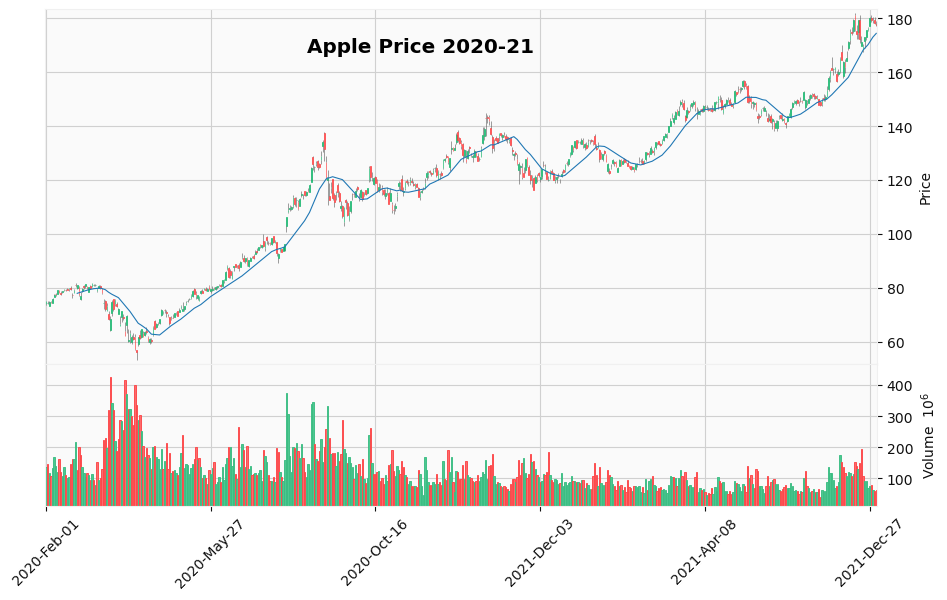

In [60]:
#figratio changes the size of the graph
mpf.plot(AAPL_stock['2020':'2021'],figratio=(20,12), 
         type='candle',
         title = 'Apple Price 2020-21',
         mav=(20), volume=True, 
         tight_layout=True,
         style = 'yahoo')

C:\Users\mklut\AppData\Local\Temp\ipykernel_18488\3369554235.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(AAPL_stock['2020-03'],type='candle', volume=True)


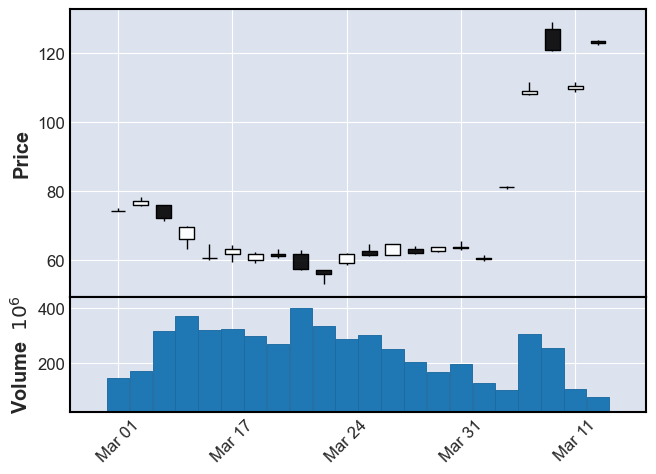

In [61]:
#Candle stick chart for March 2020
mpf.plot(AAPL_stock['2020-03'],type='candle', volume=True)

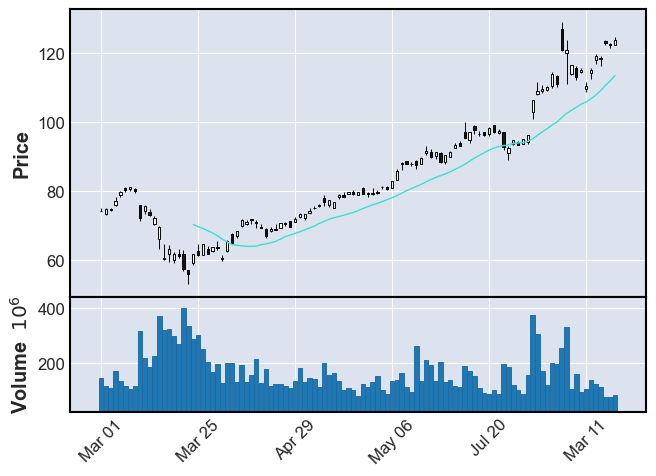

In [62]:
#mav is the moving average code
mpf.plot(AAPL_stock['2020-03':'2020-07'],type='candle', mav=(20), volume=True)

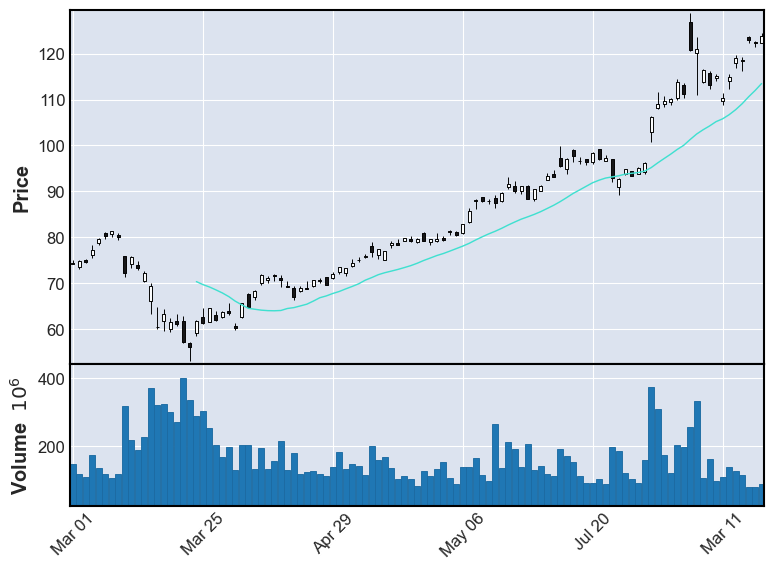

In [63]:
mpf.plot(AAPL_stock['2020-03':'2020-07'],type='candle', mav=(20), volume=True, tight_layout=True)

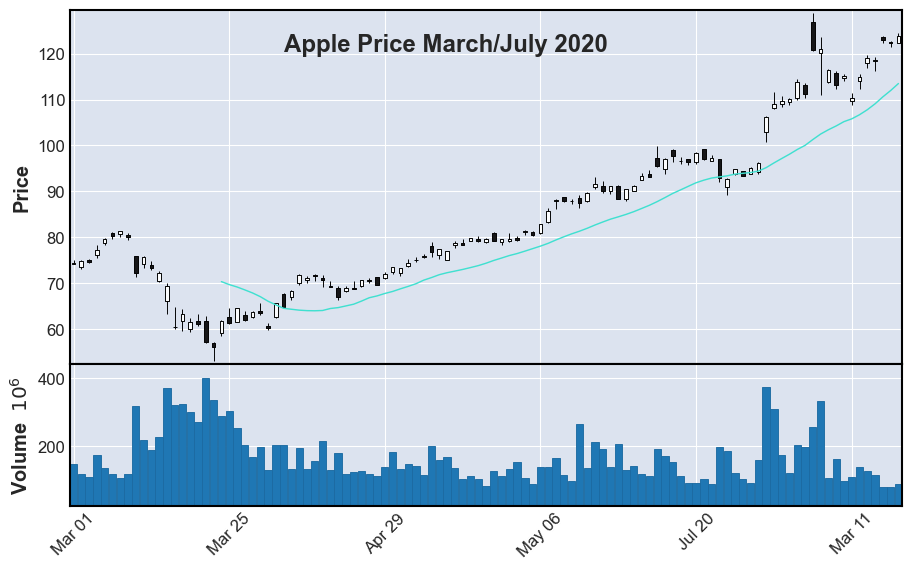

In [64]:
#figratio changes the size of the graph
mpf.plot(AAPL_stock['2020-03':'2020-07'],figratio=(20,12), 
         type='candle',
         title = 'Apple Price March/July 2020',
         mav=(20), volume=True, 
         tight_layout=True)

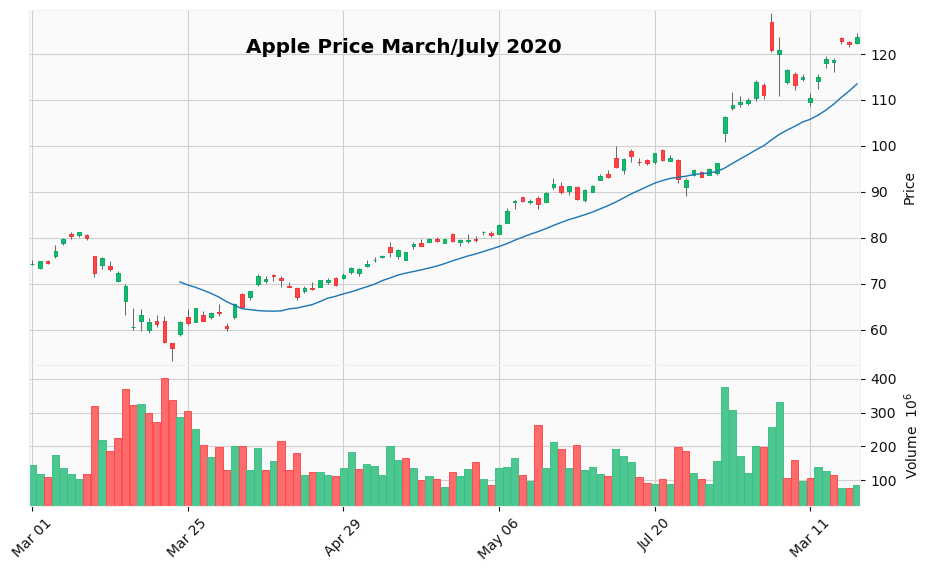

In [65]:
#figratio changes the size of the graph
mpf.plot(AAPL_stock['2020-03':'2020-07'],figratio=(20,12), 
         type='candle',
         title = 'Apple Price March/July 2020',
         mav=(20), volume=True, 
         tight_layout=True,
         style = 'yahoo')